In [49]:
import numpy as np
import pandas as pd
from sklearn.decomposition import KernelPCA
import matplotlib as mpl
import matplotlib.pyplot as plt

In [50]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
           'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
           'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
           'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
           'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
           'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
           '^GDAXI']

data = pd.DataFrame()
h5 = pd.HDFStore('DAXCompAll.h5')
# start='2010-01-01', end='2015-12-31', Close Price
for sym in symbols:
    data[sym] = h5[sym]
h5.close()

dax = pd.DataFrame(data.pop('^GDAXI'))


In [51]:
dax

,^GDAXI
b'Date',
2010-01-04,6048.299805
2010-01-05,6031.859863
2010-01-06,6034.330078
2010-01-07,6019.359863
2010-01-08,6037.609863
2010-01-11,6040.500000
2010-01-12,5943.000000
2010-01-13,5963.140137
2010-01-14,5988.879883


In [52]:
prices = pd.DataFrame()
prices = data
tags = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
        'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
        'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
        'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
        'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
        'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE']


In [53]:
prices

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,CBK.DE,CON.DE,DAI.DE,DB1.DE,...,LIN.DE,LXS.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SDF.DE,SIE.DE,TKA.DE,VOW3.DE
b'Date',,,,,,,,,,,,,,,,,,,,,
2010-01-04,38.505,88.54,44.850,56.400,46.445,32.050,4.8427,36.86780,37.550,58.640,...,85.00,27.760,65.21,108.30,68.7311,32.940,41.740,63.4424,27.395,64.50
2010-01-05,39.720,88.81,44.170,55.370,46.200,32.310,5.0070,39.17420,37.240,58.520,...,83.02,28.495,64.73,108.50,68.2926,32.645,44.525,63.4811,27.765,63.25
2010-01-06,39.400,89.50,44.450,55.020,46.165,32.810,5.1745,39.43040,37.250,57.800,...,84.44,28.350,64.69,107.80,68.1630,33.225,45.020,63.7137,27.630,65.00
2010-01-07,39.745,88.47,44.155,54.300,45.700,33.100,5.3876,44.48310,36.720,56.780,...,83.92,28.935,66.05,108.05,67.8740,34.105,46.200,64.4696,27.550,65.75
2010-01-08,39.600,87.99,44.020,53.820,44.380,32.655,5.4573,45.30510,36.935,55.850,...,83.10,28.505,65.38,107.85,67.7743,34.345,46.040,64.8765,28.070,66.46
2010-01-11,39.850,87.00,43.530,53.810,45.210,32.170,5.5215,43.08090,37.200,56.260,...,83.58,28.235,65.61,108.25,68.5717,34.675,45.680,65.0413,27.400,66.95
2010-01-12,38.595,86.63,41.980,53.300,43.755,31.235,5.2850,40.84500,36.280,55.000,...,82.86,28.065,64.97,108.55,67.8740,34.340,44.305,64.2467,26.740,65.20
2010-01-13,38.105,86.78,42.375,54.280,43.655,31.425,5.2522,42.20000,36.185,55.070,...,84.11,29.555,65.00,108.65,67.7245,34.695,44.730,64.8281,27.130,63.50
2010-01-14,38.875,85.87,42.460,54.790,43.775,31.890,5.3932,41.99000,37.100,54.240,...,84.64,29.845,65.27,107.95,68.4421,35.350,44.335,65.1188,27.225,63.50


In [54]:
returns = pd.DataFrame()
logret = pd.DataFrame()
for sym in tags:
	returns[sym] = np.diff(prices[sym])/prices[sym][:-1]
	logret[sym] = np.diff( np.log(prices[sym]) )

In [55]:
print(len(returns))

1525


In [56]:
returns

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,CBK.DE,CON.DE,DAI.DE,DB1.DE,...,LIN.DE,LXS.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SDF.DE,SIE.DE,TKA.DE,VOW3.DE
b'Date',,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.031554,0.003049,-0.015162,-0.018262,-0.005275,0.008112,0.033927,0.062559,-0.008256,-0.002046,...,-0.023294,0.026477,-0.007361,0.001847,-0.006380,-0.008956,0.066723,0.000610,0.013506,-0.019380
2010-01-05,-0.008056,0.007769,0.006339,-0.006321,-0.000758,0.015475,0.033453,0.006540,0.000269,-0.012303,...,0.017104,-0.005089,-0.000618,-0.006452,-0.001898,0.017767,0.011117,0.003664,-0.004862,0.027668
2010-01-06,0.008756,-0.011508,-0.006637,-0.013086,-0.010073,0.008839,0.041183,0.128142,-0.014228,-0.017647,...,-0.006158,0.020635,0.021023,0.002319,-0.004240,0.026486,0.026211,0.011864,-0.002895,0.011538
2010-01-07,-0.003648,-0.005426,-0.003057,-0.008840,-0.028884,-0.013444,0.012937,0.018479,0.005855,-0.016379,...,-0.009771,-0.014861,-0.010144,-0.001851,-0.001469,0.007037,-0.003463,0.006312,0.018875,0.010798
2010-01-08,0.006313,-0.011251,-0.011131,-0.000186,0.018702,-0.014852,0.011764,-0.049094,0.007175,0.007341,...,0.005776,-0.009472,0.003518,0.003709,0.011766,0.009608,-0.007819,0.002540,-0.023869,0.007373
2010-01-11,-0.031493,-0.004253,-0.035608,-0.009478,-0.032183,-0.029064,-0.042833,-0.051900,-0.024731,-0.022396,...,-0.008615,-0.006021,-0.009755,0.002771,-0.010175,-0.009661,-0.030101,-0.012217,-0.024088,-0.026139
2010-01-12,-0.012696,0.001732,0.009409,0.018386,-0.002285,0.006083,-0.006206,0.033174,-0.002619,0.001273,...,0.015086,0.053091,0.000462,0.000921,-0.002203,0.010338,0.009593,0.009049,0.014585,-0.026074
2010-01-13,0.020207,-0.010486,0.002006,0.009396,0.002749,0.014797,0.026846,-0.004976,0.025287,-0.015072,...,0.006301,0.009812,0.004154,-0.006443,0.010596,0.018879,-0.008831,0.004484,0.003502,0.000000
2010-01-14,0.001029,-0.012810,-0.021079,-0.030115,-0.025128,-0.008153,-0.024957,-0.030960,-0.016442,-0.013827,...,-0.016777,-0.016083,0.015627,-0.016674,-0.008010,-0.035361,-0.015225,-0.011458,-0.020937,-0.032126


In [57]:
logret

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,CBK.DE,CON.DE,DAI.DE,DB1.DE,...,LIN.DE,LXS.DE,MRK.DE,MUV2.DE,RWE.DE,SAP.DE,SDF.DE,SIE.DE,TKA.DE,VOW3.DE
0,0.031067,0.003045,-0.015278,-0.018431,-0.005289,0.008080,0.033365,0.060680,-0.008290,-0.002048,...,-0.023570,0.026132,-0.007388,0.001845,-0.006400,-0.008996,0.064591,0.000610,0.013416,-0.019570
1,-0.008089,0.007739,0.006319,-0.006341,-0.000758,0.015357,0.032906,0.006519,0.000268,-0.012380,...,0.016960,-0.005102,-0.000618,-0.006473,-0.001900,0.017611,0.011056,0.003657,-0.004874,0.027292
2,0.008718,-0.011575,-0.006659,-0.013173,-0.010124,0.008800,0.040357,0.120572,-0.014330,-0.017805,...,-0.006177,0.020425,0.020805,0.002316,-0.004249,0.026141,0.025873,0.011794,-0.002900,0.011472
3,-0.003655,-0.005440,-0.003062,-0.008879,-0.029309,-0.013535,0.012854,0.018310,0.005838,-0.016515,...,-0.009819,-0.014972,-0.010196,-0.001853,-0.001470,0.007012,-0.003469,0.006292,0.018699,0.010741
4,0.006293,-0.011315,-0.011194,-0.000186,0.018529,-0.014964,0.011695,-0.050340,0.007149,0.007314,...,0.005760,-0.009517,0.003512,0.003702,0.011697,0.009563,-0.007850,0.002537,-0.024158,0.007346
5,-0.032000,-0.004262,-0.036257,-0.009523,-0.032712,-0.029495,-0.043777,-0.053295,-0.025042,-0.022651,...,-0.008652,-0.006039,-0.009802,0.002768,-0.010227,-0.009708,-0.030563,-0.012292,-0.024382,-0.026487
6,-0.012777,0.001730,0.009365,0.018220,-0.002288,0.006064,-0.006226,0.032636,-0.002622,0.001272,...,0.014973,0.051730,0.000462,0.000921,-0.002205,0.010285,0.009547,0.009009,0.014480,-0.026420
7,0.020006,-0.010542,0.002004,0.009352,0.002745,0.014689,0.026492,-0.004989,0.024972,-0.015186,...,0.006282,0.009764,0.004145,-0.006464,0.010540,0.018703,-0.008870,0.004474,0.003496,0.000000
8,0.001028,-0.012893,-0.021304,-0.030578,-0.025450,-0.008186,-0.025274,-0.031449,-0.016579,-0.013924,...,-0.016919,-0.016214,0.015507,-0.016815,-0.008042,-0.036001,-0.015342,-0.011524,-0.021159,-0.032653
9,0.006531,0.000236,0.018001,0.019751,0.027047,0.014750,-0.004269,0.031925,0.016983,0.005035,...,-0.002286,0.042992,-0.011226,0.020975,-0.005151,-0.004850,0.013649,0.005254,0.002997,0.002762


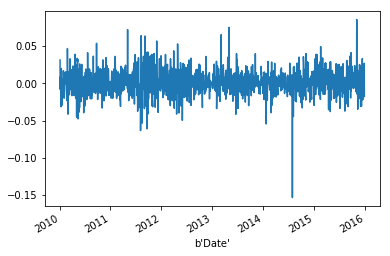

In [58]:
returns["ADS.DE"].plot()

In [59]:
print(returns.shape)

(1525, 30)


In [60]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from statsmodels.tsa.stattools import coint
from scipy import stats


In [61]:
N_PRIN_COMPONENTS = 20
pca = PCA(n_components=N_PRIN_COMPONENTS)
pca.fit(returns)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [62]:
pca.components_.T.shape

(30, 20)

In [63]:
print(returns_pca.shape)

(30, 20)


In [64]:
X = pca.components_.T

In [65]:
print(X.shape)

(30, 20)


In [66]:
X = preprocessing.StandardScaler().fit_transform(X)

In [67]:
print(X.shape)

(30, 20)


In [68]:
clf = DBSCAN(eps=1.9, min_samples=2)

In [69]:
print(clf)

DBSCAN(algorithm='auto', eps=1.9, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=1, p=None)


In [70]:
clf.fit(X)

DBSCAN(algorithm='auto', eps=1.9, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=1, p=None)

In [71]:
labels = clf.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [72]:
print("\nClusters discovered: ", n_clusters_)


Clusters discovered:  4


In [73]:
clustered = clf.labels_
# the initial dimensionality of the search was
ticker_count = len(returns.columns)

In [74]:
print("Total pairs possible in universe: ", (ticker_count*(ticker_count-1)/2))

Total pairs possible in universe:  435.0


In [75]:
clustered_series = pd.Series(index=returns.columns, data=clustered.flatten())
clustered_series_all = pd.Series(index=returns.columns, data=clustered.flatten())
clustered_series = clustered_series[clustered_series != -1]

In [76]:
CLUSTER_SIZE_LIMIT = 9999
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts>1) & (counts<=CLUSTER_SIZE_LIMIT)]

In [77]:
print("Clusters formed: ", len(ticker_count_reduced))

Clusters formed:  4


In [78]:
print("Pairs to evaluate: ", (ticker_count_reduced*(ticker_count_reduced-1)).sum())

Pairs to evaluate:  8


In [79]:
X_tsne = TSNE(learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X)

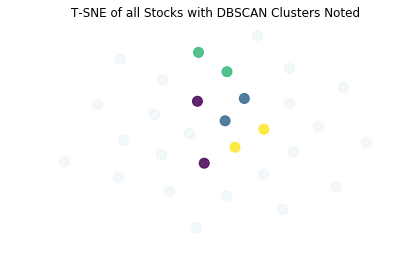

In [80]:
plt.figure(1, facecolor='white')
plt.clf()
plt.axis('off')
plt.scatter(X_tsne[(labels!=-1), 0], X_tsne[(labels!=-1), 1], s=100, 
    alpha=0.85, c=labels[labels!=-1] #,cmap=cm.Paired
)

plt.scatter(X_tsne[(clustered_series_all==-1).values, 0],
    X_tsne[(clustered_series_all==-1).values, 1], s=100, alpha=0.05)

plt.title('T-SNE of all Stocks with DBSCAN Clusters Noted');

Text(0,0.5,'Cluster Number')

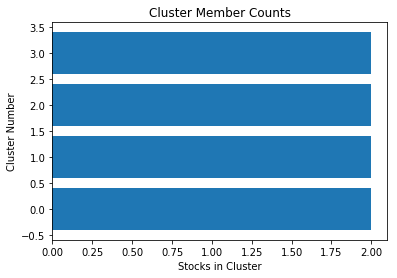

In [81]:
plt.barh(range(len(clustered_series.value_counts())), clustered_series.value_counts())
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')

In [82]:
# get the number of stocks in each cluster
counts = clustered_series.value_counts()

In [83]:
# let's visualize some clusters
cluster_vis_list = list(counts[(counts<20) & (counts>1)].index)[::-1]

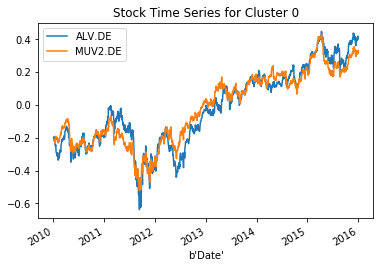

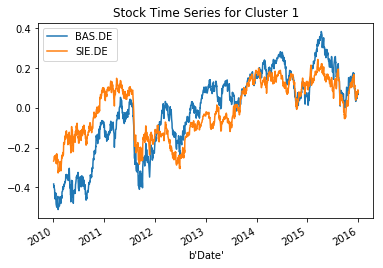

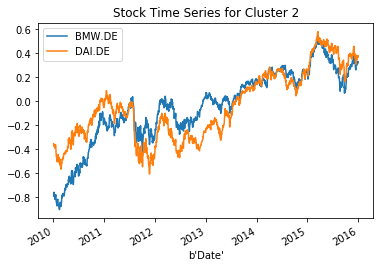

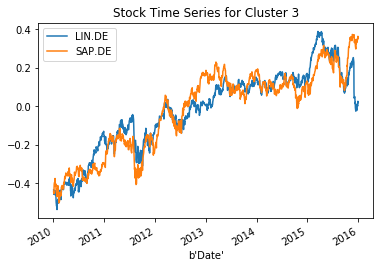

In [84]:
for clust in cluster_vis_list[0:len(cluster_vis_list)]:
    tickers = list(clustered_series[clustered_series==clust].index)
    means = np.log(prices[tickers].mean())
    data = np.log(prices[tickers]).sub(means)
    data.plot(title='Stock Time Series for Cluster %d' % clust)

In [85]:
ticker_count_reduced

3    2
2    2
1    2
0    2
dtype: int64

In [86]:
ticker_count_reduced_minus_1 = ticker_count_reduced-1

In [87]:
ticker_count_reduced_minus_1

3    1
2    1
1    1
0    1
dtype: int64

In [88]:
print("Pairs to evaluate: ", (ticker_count_reduced*(ticker_count_reduced_minus_1)).sum()/2)

Pairs to evaluate:  4.0
